In [1]:
import sys, os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
sys.path.append('../')
from utilities import define_dataset, inference_phase_rUNet, inference_phase_rUNet_plot_notebook, training_phase_rUNet

In [2]:
import torch

In [3]:
DATA_DIR_DEEPTHOUGHT = "/storage/yw18581/data"

In [4]:
data_dir = DATA_DIR_DEEPTHOUGHT


In [5]:
root_folder = os.path.join(data_dir, "dataset")

In [6]:
excluded =  ['10x10_2mm_first_clean', '10x10_4mm_first_clean', '10x10_10mm_first_clean', '10x10_20mm_first_clean',
            '10x10_25mm_first_clean', '10x10_35mm_first_clean',
            '10x10_2mm_second_clean', '10x10_4mm_second_clean', '10x10_10mm_second_clean', '10x10_20mm_second_clean',
            '10x10_25mm_second_clean', '10x10_35mm_second_clean',
            '10x10_2mm_third_clean', '10x10_4mm_third_clean', '10x10_10mm_third_clean', '10x10_20mm_third_clean', 
           '10x10_25mm_third_clean', '10x10_35mm_third_clean']

In [7]:
define_dataset?

In [8]:
data_loaders, data_lengths = define_dataset(root_folder, batch_size=16, excluded_list=excluded)

In [9]:
data_lengths

{'train': 2261, 'val': 565, 'test': 706}

In [10]:
from cUNet_pytorch_pooling import cUNet

In [11]:
model = cUNet(out_size=1)

In [12]:
model_path =  "../model/trained_cUNet_pytorch_regression_2_4_10_20_25_35_dataset_300epochs_coeff_mask0.75_validation.pkl"

In [13]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

batch 1
1: true_dist: 30, pred_dist: [30.993975]


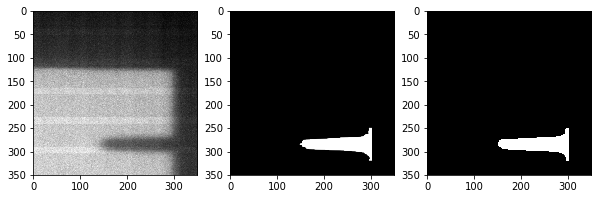

2: true_dist: 30, pred_dist: [30.913782]


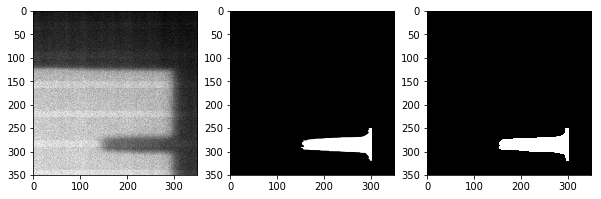

3: true_dist: 3, pred_dist: [3.475035]


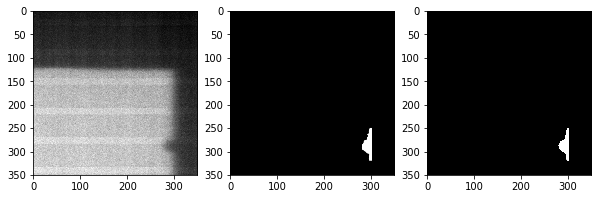

4: true_dist: 15, pred_dist: [14.665726]


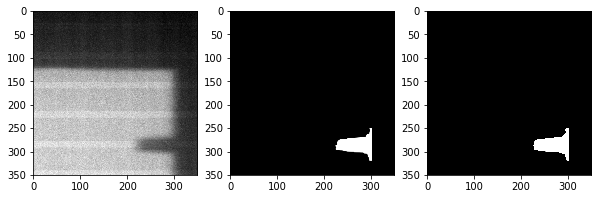

5: true_dist: 30, pred_dist: [30.904583]


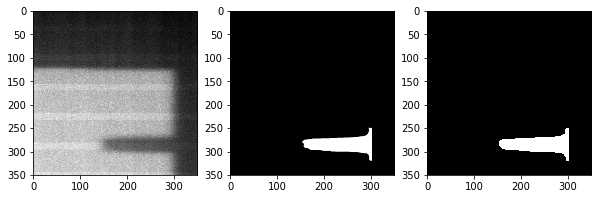

6: true_dist: 30, pred_dist: [30.998926]


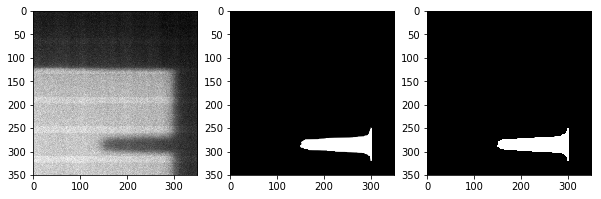

7: true_dist: 30, pred_dist: [30.921875]


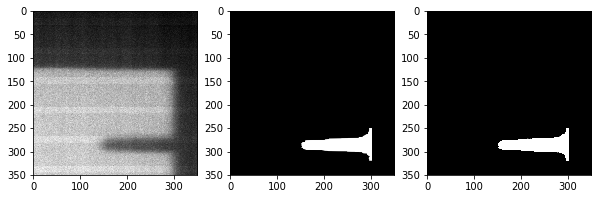

8: true_dist: 3, pred_dist: [3.5200515]


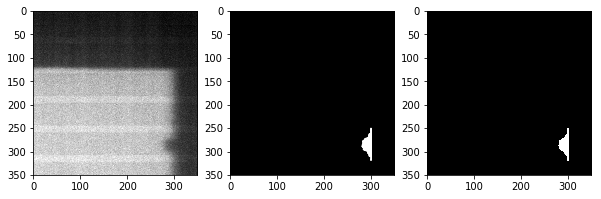

9: true_dist: 30, pred_dist: [31.270132]


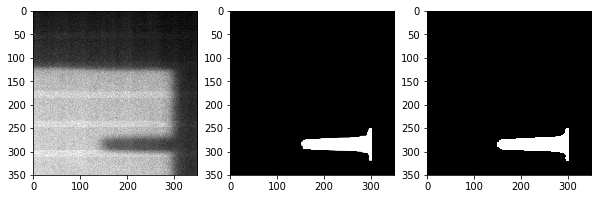

10: true_dist: 3, pred_dist: [3.5207703]


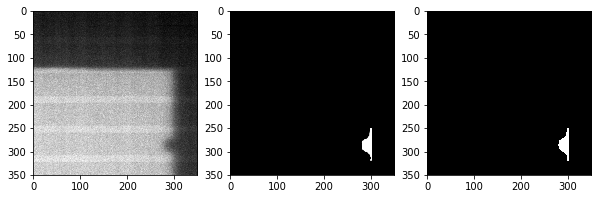

11: true_dist: 15, pred_dist: [14.680459]


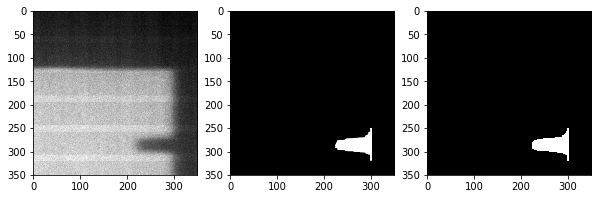

12: true_dist: 30, pred_dist: [30.989222]


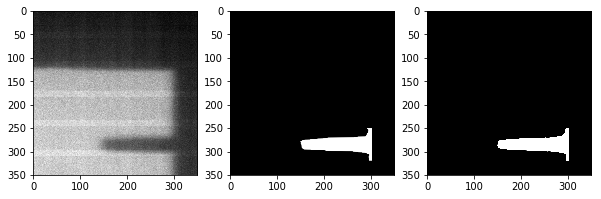

13: true_dist: 3, pred_dist: [3.5403352]


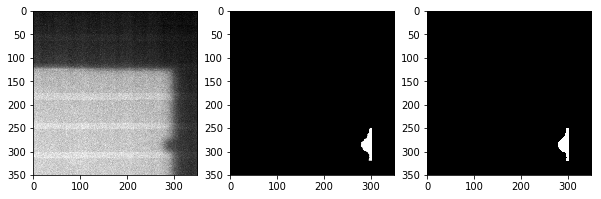

14: true_dist: 15, pred_dist: [14.687631]


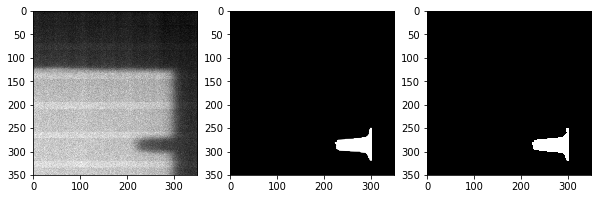

15: true_dist: 30, pred_dist: [30.910887]


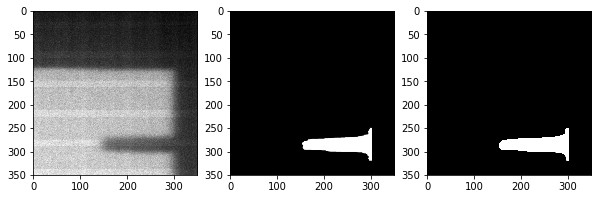

16: true_dist: 1, pred_dist: [1.9621991]


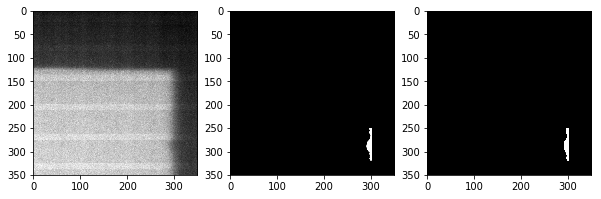

In [14]:
inference_phase_rUNet_plot_notebook(model, model_path, data_loaders, data_lengths, batch_size=16, stop=2)

In [33]:
torch.cuda.empty_cache()

In [34]:
y_true, y_pred = inference_phase_rUNet(model, 
                                       data_loaders, data_lengths, batch_size=16,
                                       notebook=True)

In [35]:
y_true

array([ 3, 30,  1, 15,  1,  1, 30,  3,  3,  3, 15,  1,  3,  3,  3,  3, 15,
       15,  1, 15,  1, 15,  3,  1, 15,  3, 15,  1,  3, 30,  3, 15,  3, 15,
       15,  1,  1, 15, 15, 15, 15, 30,  3,  1,  1, 30,  3,  3, 30, 30,  3,
       30, 15,  1, 30,  1, 15,  3,  1,  1,  3, 30,  1, 15,  1, 30,  3, 15,
        1,  1, 15,  1, 30,  1, 15, 15, 30,  3, 30, 30,  1, 15, 15, 15, 30,
        3,  3, 15, 30, 30, 30,  3, 30, 30, 15, 15, 15, 15, 30,  1,  3, 15,
       30, 30,  1,  1, 15,  1, 15,  3, 15, 15, 15,  3, 30,  3, 15, 30,  3,
        3,  3, 15, 15, 15, 30, 30, 30, 30,  3, 30, 30, 30,  3,  1, 30,  3,
       15, 30,  1,  3, 15,  3,  3, 15,  1, 30,  3, 15, 15,  1,  3,  1,  1,
       15, 15, 15, 15,  1, 15, 15, 15,  1,  1, 15, 15, 15, 30,  1,  1, 15,
        1,  1, 15,  3,  3,  1,  1, 15, 30, 30, 15, 15, 15,  3, 30, 15,  1,
       15, 30,  1, 30,  3,  3, 30, 15,  3,  1, 15,  3,  3, 30, 15,  1, 15,
       15,  1, 15,  3,  3,  1, 15,  1,  1,  3,  3, 30, 30, 30,  3, 30,  1,
        1, 30, 30,  1, 15

In [36]:
y_pred


array([ 3.5333078, 30.989353 ,  1.9868398, 14.680414 ,  1.9810473,
        1.9690074, 30.936785 ,  3.4465303,  3.362447 ,  3.4112055,
       14.68465  ,  1.9886618,  3.4783993,  3.515714 ,  3.4752896,
        3.4836605, 14.672988 , 14.683222 ,  1.9613588, 14.675182 ,
        1.9460218, 14.681071 ,  3.4766023,  1.9814074, 14.690678 ,
        3.4250863, 14.688911 ,  1.9513456,  3.4247906, 31.256176 ,
        3.4627783, 14.674845 ,  3.4554472, 14.698339 , 14.675324 ,
        1.9591266,  1.966907 , 14.678897 , 14.694196 , 14.679446 ,
       14.675259 , 30.934256 ,  3.5937834,  1.9952092,  1.9611874,
       31.053463 ,  3.875303 ,  3.6132774, 30.998936 , 31.003443 ,
        3.5073996, 30.915226 , 14.677889 ,  1.9441513, 30.968851 ,
        1.9723768, 14.681068 ,  3.4969177,  1.9564433,  1.9569227,
        3.5143774, 30.939438 ,  1.9765618, 14.666138 ,  1.977569 ,
       30.92562  ,  3.4698186, 14.681284 ,  1.9781262,  1.962121 ,
       14.682915 ,  1.9693813, 30.922232 ,  1.9554795, 14.6720

In [37]:
mean_squared_error(y_true, y_pred)

0.5612835608141801